In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm

# MULTIEVO 
## Parallel vs serial
Using the library `multiprocessing` to evolve many independent simulations in parallel. n_workers = n_cores (8) 

 See `final_multievo_experiments.py`to see how data is created.

In [3]:
df = pd.read_csv("parallel_vs_serial_ONETSTEP.csv")
std_group = df.groupby(['n_particles', 'n_simulations'])[['parallel_time', 'serial_time']].agg(['mean', 'std'])


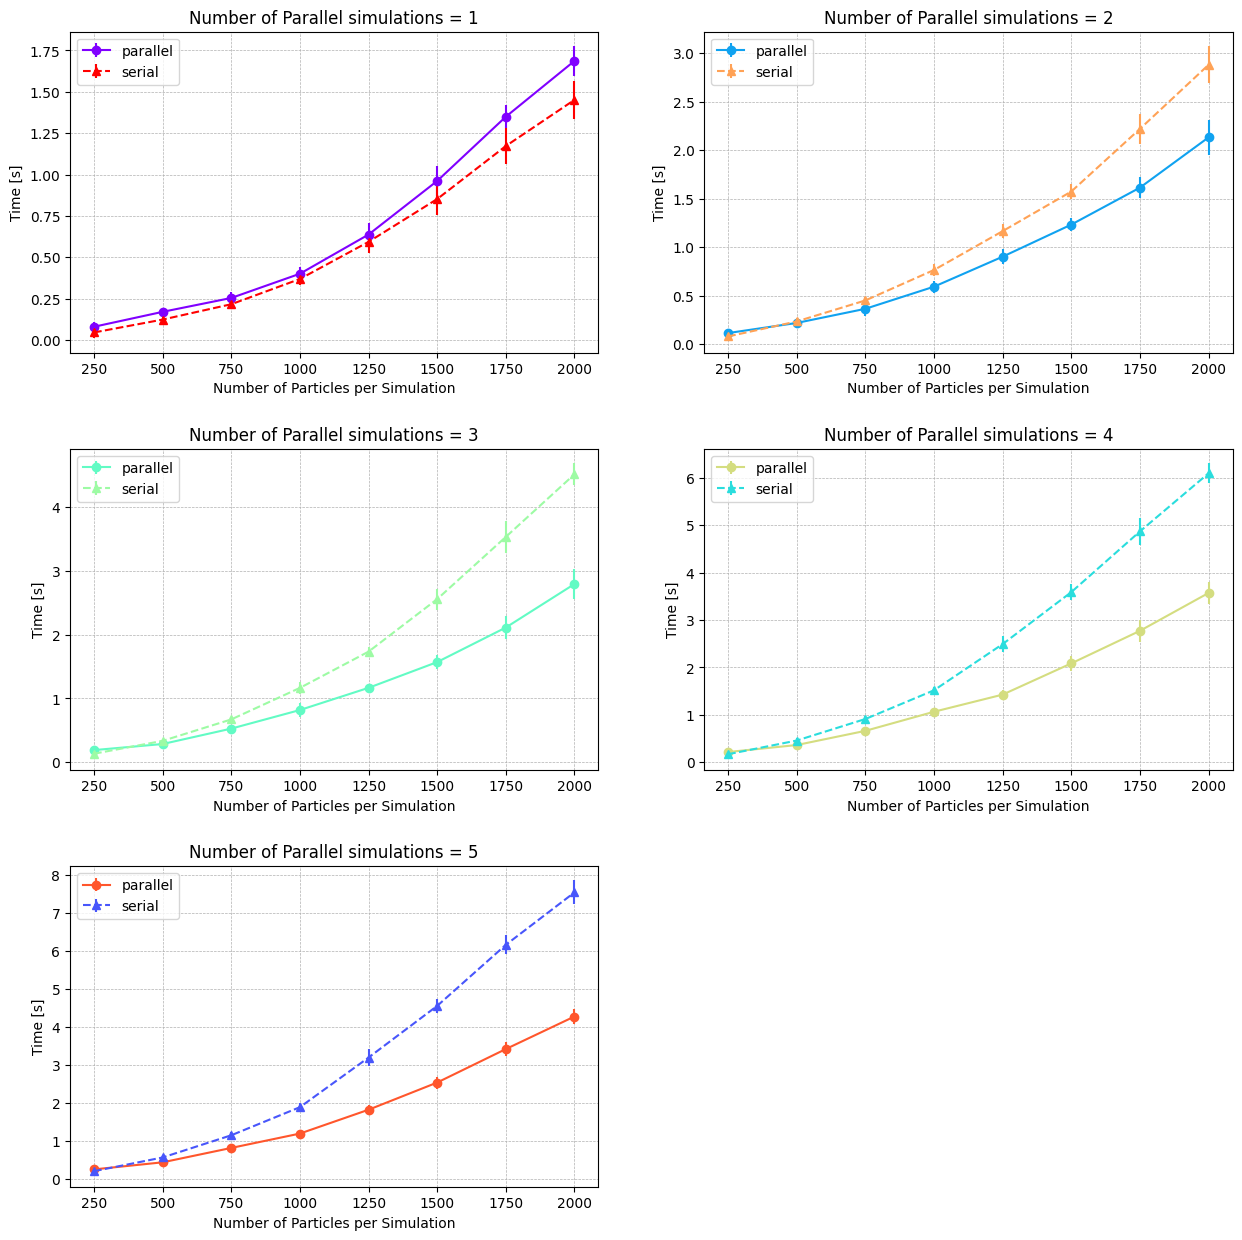

In [6]:
fig,axs = plt.subplots(3,2,figsize=(15,15))

plt.subplots_adjust(hspace=0.3, wspace=0.2)
axs = axs.flatten() # for easy indexing

colors = [cm.rainbow(i) for i in np.linspace(0, 1, 10)]

i = 0 
for name, group in std_group[["parallel_time","serial_time"]].groupby("n_simulations"):
  
        
    ax = axs[i]
    
    # each group has n_particles fixed (that is its "name")
    n_particles = group["parallel_time"]["mean"].keys().get_level_values(0).values #[ 250  500  750 1000 1250 1500 1750 2000]
    # group.values are parallel times
    # group.values.shape (8,2)
    # Create new axes
    
    # group.values.shape = (8,4) mean,std,mean,std
    # Plot the scatter
    
    ax.errorbar(n_particles, group["parallel_time"].values[:,0], yerr=group["parallel_time"].values[:,1],marker="o", label="parallel",c= colors[2*i])
    ax.errorbar(n_particles, group["serial_time"].values[:,0], yerr=group["serial_time"].values[:,1], marker="^",label="serial",c= colors[-(2*i+1)],linestyle='--')
    
    # Set labels and title
    ax.set_xlabel('Number of Particles per Simulation')
    ax.set_ylabel('Time [s]')
    ax.set_title(f'Number of Parallel simulations = {name}')
    ax.grid(linestyle='--', linewidth=0.5)
    
    
    # Add legend
    ax.legend()

    i +=1 
    
fig.delaxes(axs[-1])

plt.savefig("parallel_vs_serial.pdf")
# Show the plot
plt.show()
    


Il prossimo lo tengo solo per far vedere che non si capisce una sega

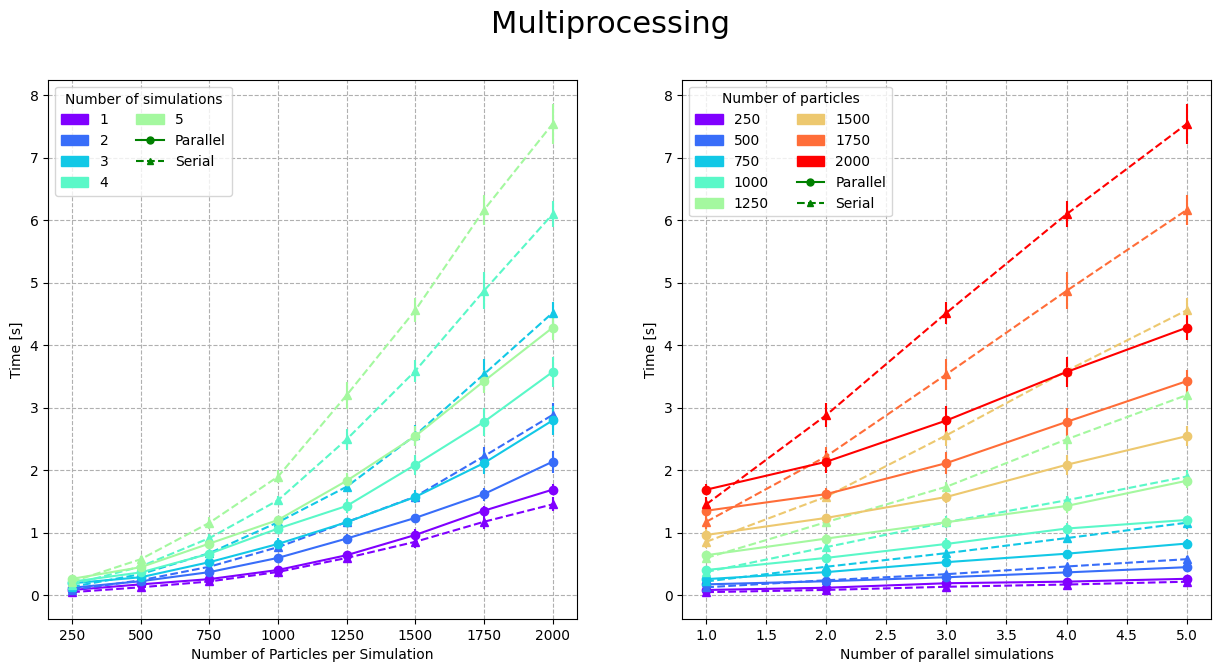

In [5]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm
grouped = std_group

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 8)]

legend_handles = []
legend_labels = []
i = 0
for name, group in grouped[["parallel_time", "serial_time"]].groupby("n_simulations"):
    n_particles = group["parallel_time"]["mean"].keys().get_level_values(0).values

    axs[0].errorbar(n_particles, group["parallel_time"].values[:, 0], yerr=group["parallel_time"].values[:, 1], marker="o", label="parallel", c=colors[i])
    axs[0].errorbar(n_particles, group["serial_time"].values[:, 0], yerr=group["serial_time"].values[:, 1], marker="^", label="serial", c=colors[i],linestyle="--")
    # Create custom legend entry with colored patch
    n_simulations_patch = mpatches.Patch(color=colors[i], label=f'{name}')
    legend_handles.append(n_simulations_patch)
    legend_labels.append(f'{name}')

    i += 1

# Add the multiprocessing dot to the legend
multiprocessing_dot = mlines.Line2D([], [], color='green', marker='o', markersize=5, label='Multiprocessing')
njit_dot = mlines.Line2D([], [], color='green', marker='^', markersize=5, linestyle="--", label='Serial')
legend_handles.append(multiprocessing_dot)
legend_labels.append('Parallel')
legend_handles.append(njit_dot)
legend_labels.append('Serial')

# Set labels and title
axs[0].set_xlabel('Number of Particles per Simulation')
axs[0].set_ylabel('Time [s]')

# Create custom legend
#axs[0].legend(handles=[parallel_patch, serial_patch], loc="upper left")
#axs[0].set_title("Multiprocessing and NJIT - from 1 to 5 parallel simulations")
axs[0].legend(handles=legend_handles, labels=legend_labels, title="Number of simulations", loc="upper left",ncols=2)
axs[0].grid(linestyle='--')
######################################################

# Store handles and labels for legend creation
legend_handles = []
legend_labels = []
i = 0
for name, group in grouped[["parallel_time", "serial_time"]].groupby("n_particles"):
    n_simulations = group["parallel_time"]["mean"].keys().get_level_values(1).values
    
    # Plot only one point per color for each n_particles
    axs[1].errorbar(n_simulations, group["parallel_time"].values[:, 0], yerr=group["parallel_time"].values[:, 1], marker="o", c=colors[i])
    axs[1].errorbar(n_simulations, group["serial_time"].values[:, 0], yerr=group["serial_time"].values[:, 1], marker="^", c=colors[i], linestyle="--")

    # Create custom legend entry with colored patch
    n_particles_patch = mpatches.Patch(color=colors[i], label=f'{name}')
    legend_handles.append(n_particles_patch)
    legend_labels.append(f'{name}')
    i += 1

# Add the multiprocessing dot to the legend
multiprocessing_dot = mlines.Line2D([], [], color='green', marker='o', markersize=5, label='Parallel')
njit_dot = mlines.Line2D([], [], color='green', marker='^', markersize=5, linestyle="--", label='Serial')
legend_handles.append(multiprocessing_dot)
legend_labels.append('Parallel')
legend_handles.append(njit_dot)
legend_labels.append('Serial')

axs[1].legend(handles=legend_handles, labels=legend_labels, title="Number of particles", loc="upper left",ncols=2)

# Set labels and title
axs[1].set_xlabel('Number of parallel simulations')
axs[1].set_ylabel('Time [s]')
axs[1].grid(linestyle='--')

plt.suptitle("Multiprocessing",fontsize=22)

plt.show()



